## Nivell 1

Abans d'iniciar l'exercici importem moduls necesàris i les dades netejades a la tasca 5 del 2n Sprint.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
flights2008_delays=pd.DataFrame(pd.read_csv('2008_flights_in_USA_reported_causes.csv'))

In [3]:
flights2008=pd.DataFrame(pd.read_csv('2008_flights_in_USA.csv'))
flights2008_short=flights2008.iloc[0:50000,:]#DataFrame per a fer grafiques prova més rapidament

**Exercici 
1:**
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

* Una variable categòrica (UniqueCarrier)
* Una variable numèrica (ArrDelay)
* Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
* Dues variables numèriques (ArrDelay i DepDelay)
* Tres variables (ArrDelay, DepDelay i UniqueCarrier)
* Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).





* $\color{blue}{\text{Una variable categòrica (UniqueCarrier)}}$


In [125]:
df_fligthts_carrier=pd.DataFrame(flights2008.groupby('UniqueCarrier').sum()['Month'])
df_fligthts_carrier.sort_values('Month',inplace=True)
flights=df_fligthts_carrier['Month'].values
uniqueCarriers=list(df_fligthts_carrier.index)


Text(0.5, 1.12, 'Carriers of flights in 2008')

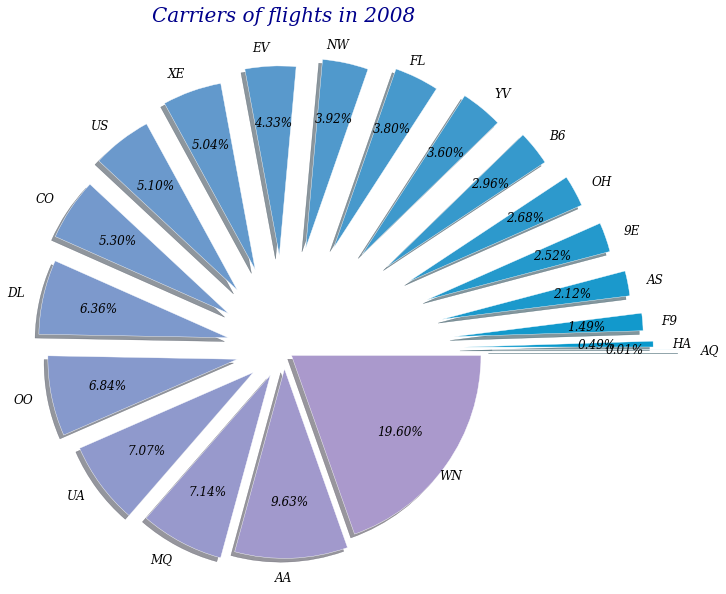

In [139]:
import random
fig, ax = plt.subplots( nrows=1, ncols=1 )
explode_0 = list(reversed([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22])) 
def aleatColors(numberColors): #he jugat amb els colors, aleatori, zones, i he deixat el que m'agrada més
    listColors=[]
    for i in range(0,numberColors):
        listColors.append([0,0,0])
        listColors[i][0]=((1/numberColors)*i)*0.7 #finalment he tret el factor aleatori però deixo el nom de la funció
        listColors[i][1]=0.6
        listColors[i][2]=0.8
    return listColors
colors= aleatColors(20)        
explode =list( map(lambda x: x *0.05, explode_0))
ax.figsize=(0,0)
ax.axis('off')
fontdict_1 = {'family': 'serif','color':  'darkblue','weight': 'normal', 'size': 20, 'style':'oblique'}
fontdict_2 = {'family': 'serif','color':  'black','weight': 'normal', 'size': 12, 'style':'oblique'}#Estil dels títols
ax.pie(flights,center=(-1,-1),explode = explode,shadow=True, labels = uniqueCarriers,radius=1.0, autopct = '%1.2f%%',colors=colors,textprops =fontdict_2,pctdistance=0.7 )
ax.set_title("Carriers of flights in 2008", y=1.12, pad=35,fontdict=fontdict_1)


In [140]:
fig.figure.savefig('ratio_Carriers_2008.jpg',bbox_inches='tight',pad_inches = 0.210)

* $\color{blue}{\text{Una variable numèrica (ArrDelay)}}$



In [8]:
arrDelay=list(flights2008['ArrDelay'])

In [9]:
flights2008['ArrDelay'].max()

2461.0

In [10]:
flights2008['ArrDelay'].min()

-109.0

Text(0.5, 1, 'Distribution of Time Delays')

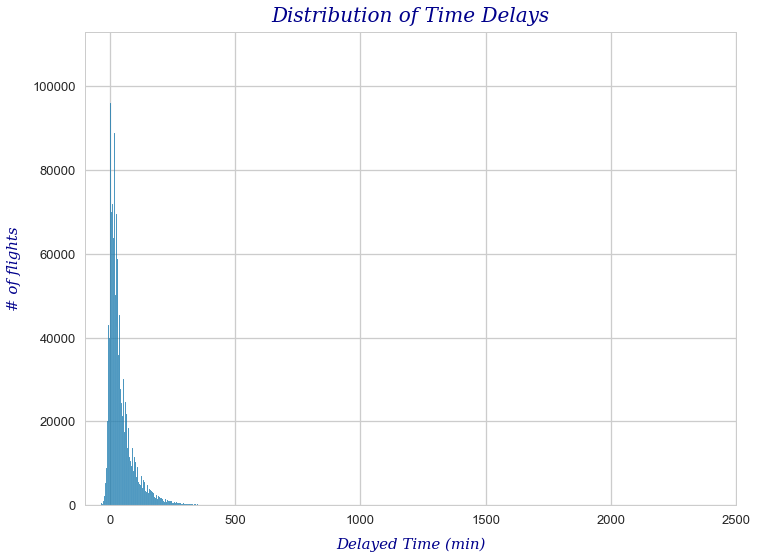

In [157]:
plt.style.use('seaborn-whitegrid')
hist_Arr_Del=sns.histplot(arrDelay, bins=1000)
fontdict_titleAxis = {'family': 'serif','color':  'darkblue','weight': 'normal', 'size': 15, 'style':'oblique'}
hist_Arr_Del.set_xlim(-100,2500)
hist_Arr_Del.set_xlabel('Delayed Time (min)', fontdict=fontdict_titleAxis,labelpad=11)
hist_Arr_Del.set_ylabel('# of flights', fontdict=fontdict_titleAxis,labelpad=11)
hist_Arr_Del.set_title("Distribution of Time Delays", y=1, pad=10,fontdict=fontdict_1)


In [159]:
hist_Arr_Del.figure.savefig('Histogram of Arrival delays.jpg',bbox_inches='tight',pad_inches = 0.210)

In [15]:
flights2008['ArrDelay'].mean()

42.19988477321014

In [16]:
flights2008['ArrDelay'].median()

24.0

In [17]:
#% de vols que tenen un retràs menor o igual a les dues hores:
100*flights2008[flights2008['ArrDelay']<=120].count()['Month']/flights2008['ArrDelay'].count()

92.11977363277087

In [18]:
import plotly.express as px #Per generar una gràfica interactiva en format html!!
fig =px.histogram(arrDelay, nbins=1000,labels='Arrival Delayed Time (min)')
fig.write_html("ArrDelay_Histogram.html")


Text(0, 0.5, "Arrival's Delayed Time (min)")

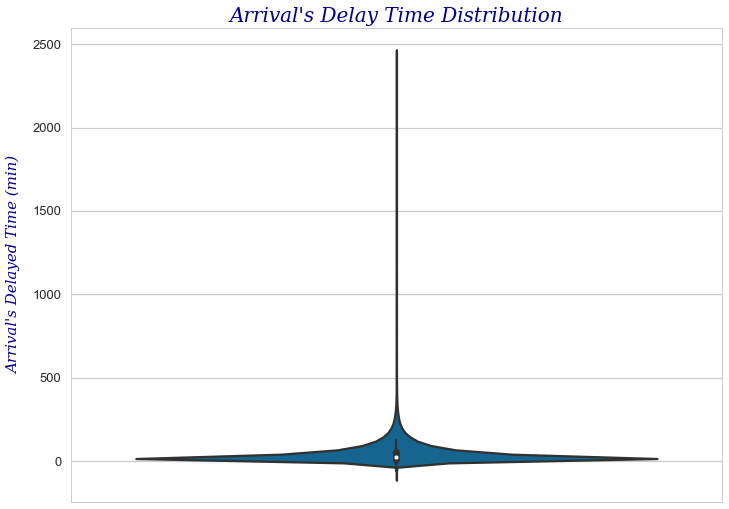

In [128]:
violin_ArrDel=sns.violinplot(data=flights2008, y='ArrDelay')
violin_ArrDel.set_title("Arrival's Delay Time Distribution",fontdict=fontdict_1)
violin_ArrDel.set_ylabel("Arrival's Delayed Time (min)", fontdict=fontdict_titleAxis,labelpad=11)


In [166]:
violin_ArrDel.figure.savefig("violin_ArrDel.jpg",bbox_inches='tight',pad_inches = 0.210)

Text(0, 0.5, "Arrival's Delayed Time (min)")

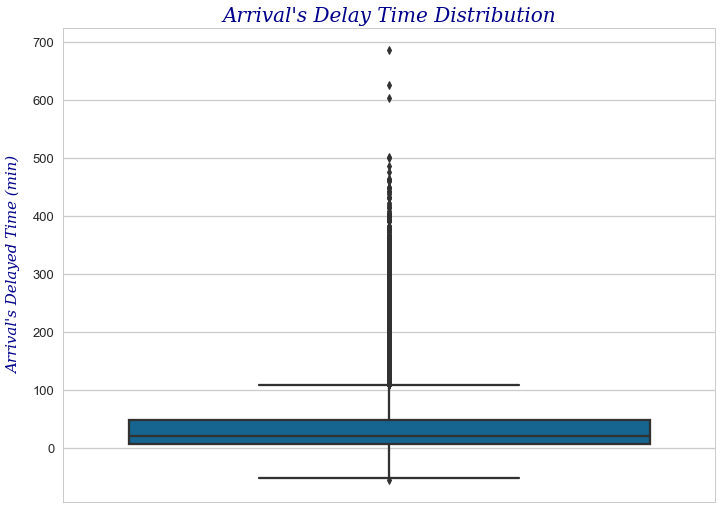

In [129]:
boxplot_ArrDel=sns.boxplot(data=flights2008_short, y='ArrDelay')
boxplot_ArrDel.set_title("Arrival's Delay Time Distribution",fontdict=fontdict_1)
boxplot_ArrDel.set_ylabel("Arrival's Delayed Time (min)", fontdict=fontdict_titleAxis,labelpad=11)


In [167]:
boxplot_ArrDel.figure.savefig("boxplot_ArrDel.jpg",bbox_inches='tight',pad_inches = 0.210)

* $\color{blue}{\text{Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)}}$


Text(0, 0.5, "Arrival's delayed Time (min)")

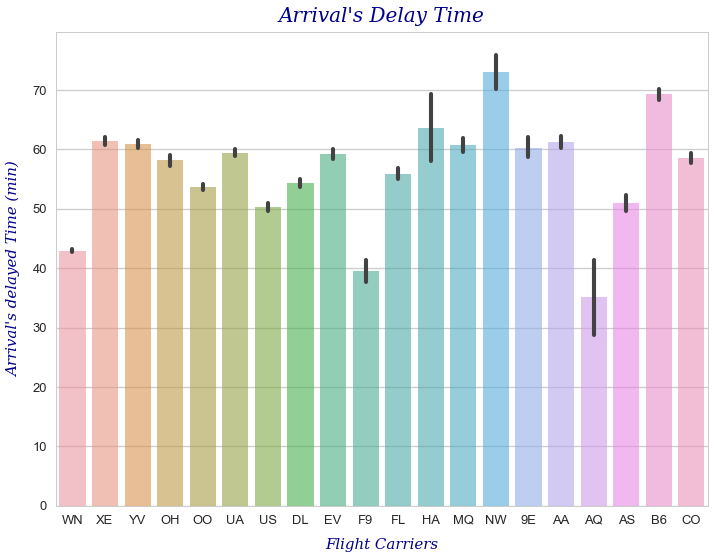

In [21]:
carrier_vs_ArrivalDelay=sns.barplot(x='UniqueCarrier',y='ArrDelay',data=flights2008,estimator=np.std,alpha=0.6)
carrier_vs_ArrivalDelay.set_title("Arrival's Delay Time", fontdict=fontdict_1,pad=10)
carrier_vs_ArrivalDelay.set_xlabel("Flight Carriers", fontdict=fontdict_titleAxis,labelpad=11)
carrier_vs_ArrivalDelay.set_ylabel("Arrival's delayed Time (min)", fontdict=fontdict_titleAxis,labelpad=11)


In [23]:
carrier_vs_ArrivalDelay.figure.savefig('carrier_vs_ArrivalDelay_barplot.jpg',bbox_inches ='tight')

* $\color{blue}{\text{Dues variables numèriques (ArrDelay i DepDelay)}}$


Text(0.5, 10.179999999999971, 'Departure Delay (min)')

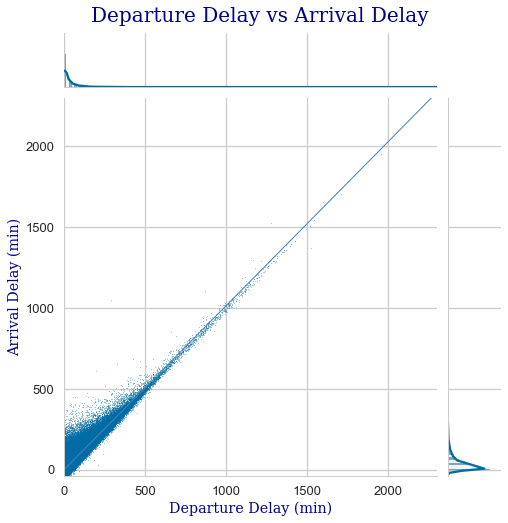

In [24]:
           
arrDel_depDel=sns.jointplot(x='DepDelay', y='ArrDelay',data=flights2008,kind='reg',scatter_kws={ 's':1},line_kws={'lw': 1, 'color': '#4682b4'},height=7,ratio=6)
arrDel_depDel.fig.suptitle('Departure Delay vs Arrival Delay',y=1.03,fontproperties ={'family': 'serif','size':'20'},color='darkblue')
arrDel_depDel.ax_joint.collections[0].set_alpha(0.5)
arrDel_depDel.ax_joint.set_xlim(0,2300)
arrDel_depDel.ax_joint.set_ylim(-40,2300)
arrDel_depDel.ax_joint.set_ylabel('Arrival Delay (min)',color='darkblue',family= 'serif')
arrDel_depDel.ax_joint.set_xlabel('Departure Delay (min)',color='darkblue',family= 'serif')

In [25]:
arrDel_depDel.savefig('arrDel_depDel_Jointplot.jpg')

* $\color{blue}{\text{Tres variables (ArrDelay, DepDelay i UniqueCarrier)}}$


(0.0, 500.0)

C:\Users\march\anaconda3\envs\notebook\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



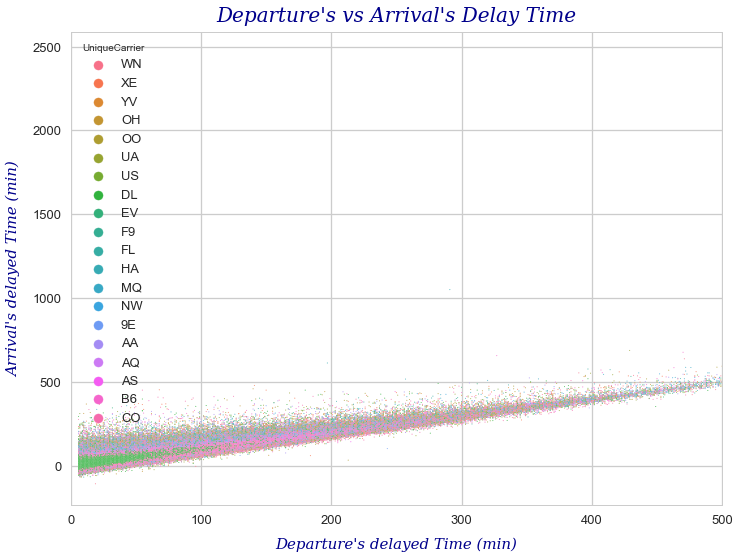

In [162]:
Dep_vs_Arr_Delays_UniqueCarriers=sns.scatterplot(x='DepDelay',y='ArrDelay',data=flights2008, hue='UniqueCarrier',s=1)
Dep_vs_Arr_Delays_UniqueCarriers.set_title("Departure's vs Arrival's Delay Time", fontdict=fontdict_1,pad=10)
Dep_vs_Arr_Delays_UniqueCarriers.set_xlabel("Departure's delayed Time (min)", fontdict=fontdict_titleAxis,labelpad=11)
Dep_vs_Arr_Delays_UniqueCarriers.set_ylabel("Arrival's delayed Time (min)", fontdict=fontdict_titleAxis,labelpad=11)
Dep_vs_Arr_Delays_UniqueCarriers.set_xlim(0,500)


In [165]:
Dep_vs_Arr_Delays_UniqueCarriers.figure.savefig('arrDel_depDel_JointplotDep_vs_Arr_Delays_UniqueCarriers.jpg',bbox_inches='tight',pad_inches = 0.210)


C:\Users\march\AppData\Local\Temp/ipykernel_25168/178039709.py:1: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



* $\color{blue}{\text{Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).}}$


In [104]:
df=flights2008.groupby('UniqueCarrier').mean()[['ArrDelay','DepDelay','AirTime']].copy()
df.sort_values('AirTime',inplace=True)

,ArrDelay,DepDelay,AirTime
UniqueCarrier,,,
YV,55.287049,55.352514,65.682098
MQ,45.295058,43.602069,69.807177
OO,45.370587,44.698733,71.176871
EV,47.554255,48.264524,72.291749
9E,46.936493,47.350695,72.970389
OH,51.016968,48.913980,82.982289
XE,50.181217,49.963004,90.891737
WN,30.087884,34.588571,93.575881
FL,43.683157,42.488664,104.562626


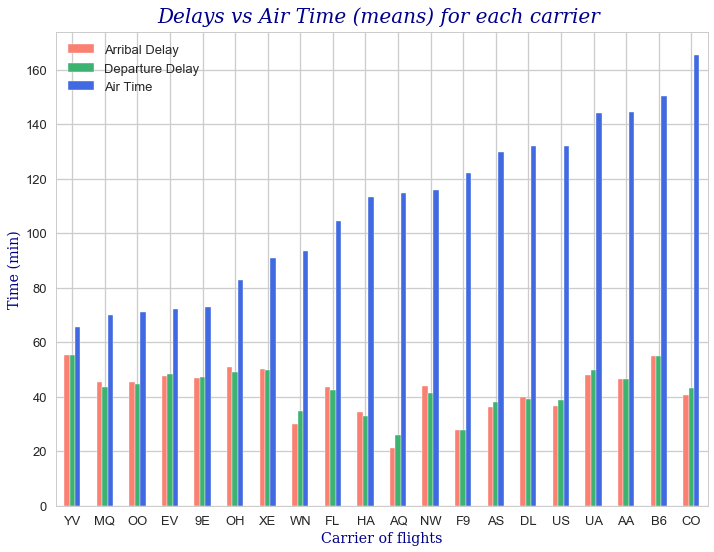

In [118]:
delays_vs_Carrier=df.plot.bar(color=['salmon','mediumseagreen','royalblue'], rot=0)
delays_vs_Carrier.set_title('Delays vs Air Time (means) for each carrier ', fontdict=fontdict_1,pad=10)
delays_vs_Carrier.set_ylabel('Time (min)',color='darkblue',family= 'serif')
delays_vs_Carrier.set_xlabel('Carrier of flights',color='darkblue',family= 'serif')#set_xlabel('Arrival Delays')
delays_vs_Carrier.legend(title=None, loc='upper left', labels=['Arribal Delay', 'Departure Delay','Air Time'])

In [122]:
delays_vs_Carrier.figure.savefig('delays_vs_airTime_hue_Carrier.jpg',bbox_inches='tight',pad_inches = 0.210)

**Exercici 
2:**
Exporta els gràfics com imatges o com html.

Ho he anat fent durant l'exercici 1!
Els penjo al Github (arxius jpg i un arxiu html interactiu)

**Exercici 
3:**
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

He guardat la Tasca_5 modificada en un altre Notebook en el repository d'aquesta tasca

**Recursos emprats/trobats:**

Exportar imatge a html:
https://community.plotly.com/t/proper-way-to-save-a-plot-to-html/7063/2

Saver la configuració del context per defecte en seaborn: 
https://seaborn.pydata.org/generated/seaborn.plotting_context.html

Bona pàgina de turorials:
https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/

sns.plotting_context() per a saver i modificar estils i tamanys per defecte:
https://seaborn.pydata.org/generated/seaborn.plotting_context.html

veure atributs d'un objecte:
https://www.delftstack.com/es/howto/python/python-print-object-attributes/

Per estudiar escales de colors dintre de Jupyter notebook:
sns.choose_colorbrewer_palette("sequential")